In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

In [106]:
#read_data
data = pd.read_csv('hmelq.csv')
pd.set_option('display.max_colwidth', -1)

In [105]:
data.head(10) # Veri içinden 10 örneklem alinarak veri hakkinda gözlem yapılıyor.

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327
5,0,17200,39316.0,66978.0,DebtCon,NaN,4.0,0.0,0.0,99.99,1.0,10.0,26.437
6,0,82200,23197.0,110481.0,HomeImp,NaN,26.0,0.0,1.0,127.77,0.0,14.0,30.943
7,0,6200,45356.0,82054.0,DebtCon,NaN,2.0,0.0,0.0,201.33,4.0,29.0,29.662
8,0,17400,113890.0,135146.0,DebtCon,NaN,16.0,0.0,0.0,174.10,1.0,17.0,37.634
9,0,8900,63342.0,78275.0,DebtCon,NaN,19.0,0.0,0.0,162.20,1.0,11.0,32.613


In [101]:
from scipy.stats import mannwhitneyu
mannwhitneyu(data[data['bad']==1]['loan'],data[data['bad']==0]['loan'])

MannwhitneyuResult(statistic=850928.0, pvalue=2.974311529891106e-12)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [77]:
data.describe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3262.000000,3512.000000,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
mean,0.199385,18529.697987,74013.907992,101076.922759,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,0.399594,11262.834060,44016.833772,54865.275351,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,0.000000,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,0.000000,11000.000000,46700.250000,65753.000000,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,0.000000,16200.000000,65858.000000,89183.000000,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,0.000000,23100.000000,91717.000000,118928.250000,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
max,1.000000,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


# Kategorik verilerin veride nasıl dağıldını bir kaç örnekle inceleyelim.

'\nBurda borc verisinin mesleklere nasil dağildini inceledik ve en fazla borcu olan kişiler \naçik ara fark ile serbest çalişanlarda olduğu görünüyor.\n'

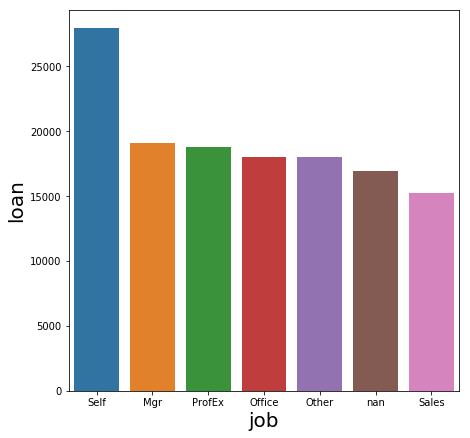

In [78]:
data.job = data.job.fillna('nan')
data.loan = data.loan.astype(float)
data_list = list(data.job.unique())
loan_ratio = []
for i in data_list:
    x = data[data.job == i]
    loan_ratio_mean = sum(x.loan)/len(x)
    loan_ratio.append(loan_ratio_mean)
    
data1 = pd.DataFrame({'job_list':data_list,'loan_ratio':loan_ratio})
new_index = (data1['loan_ratio'].sort_values(ascending = False)).index.values
shorted_data = data1.reindex(new_index)
plt.figure(figsize = (7,7))
ax = sns.barplot(x = shorted_data['job_list'],y = shorted_data['loan_ratio'])
plt.xticks(rotation = 0)
plt.xlabel('job',fontsize = 20)
plt.ylabel('loan',fontsize = 20);
"""
Burda borc verisinin mesleklere nasil dağildini inceledik ve en fazla borcu olan kişiler 
açik ara fark ile serbest çalişanlarda olduğu görünüyor.
"""

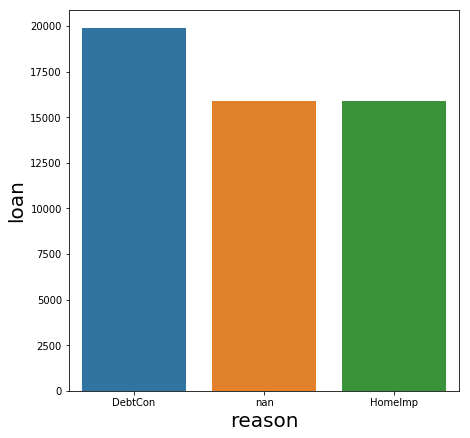

In [79]:
data.reason = data.reason.fillna('nan')
data.loan = data.loan.astype(float)
data_list2 = list(data.reason.unique())
reason_ratio = []
for i in data_list2:
    x = data[data.reason == i]
    reason_ratio_mean = sum(x.loan)/len(x)
    reason_ratio.append(reason_ratio_mean)
data2 = pd.DataFrame({'reason_list':data_list2,'reason_ratio':reason_ratio})
new_index2 = (data2['reason_ratio'].sort_values(ascending = False)).index.values
shorted_data2 = data2.reindex(new_index2)
plt.figure(figsize = (7,7))
ax = sns.barplot(x = shorted_data2['reason_list'],y = shorted_data2['reason_ratio'])
plt.xticks(rotation = 0)
plt.xlabel('reason',fontsize = 20)
plt.ylabel('loan',fontsize = 20); 

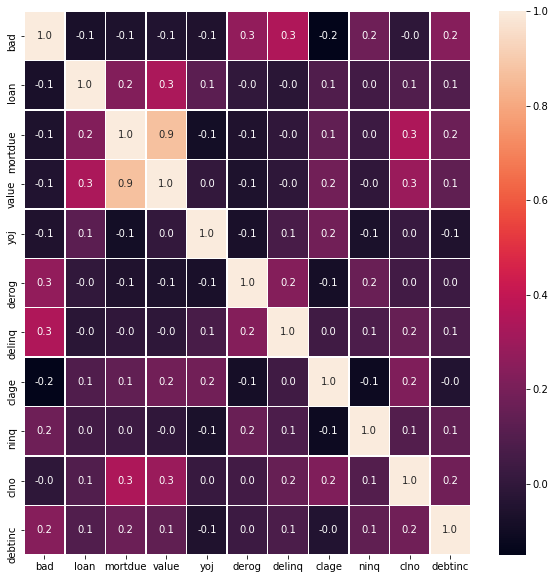

In [80]:
#corelation

fig,ax = plt.subplots(figsize = (10,10))

sns.heatmap(data.corr(method = 'pearson'),annot= True, linewidths=.5, fmt= '.1f');
#Veirinin korelasyon matrisi çıkarılır.
#görüldü gibi mortdue ve value arasında pozitif yüksek korelasyan var.

In [81]:
#not:korelasyon matrisin inceledimiz de mortdue ve value arasin yüksek bir korelasyon olduğunu görüyoruz.
# Öncelikle bu iki değer arasında ki ilişkiyi grafiklerle incelemeye çalışalım

C:\Users\numan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\numan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


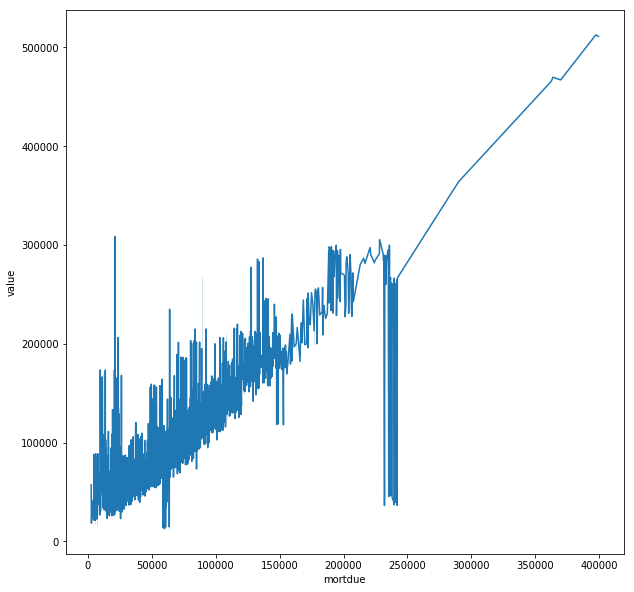

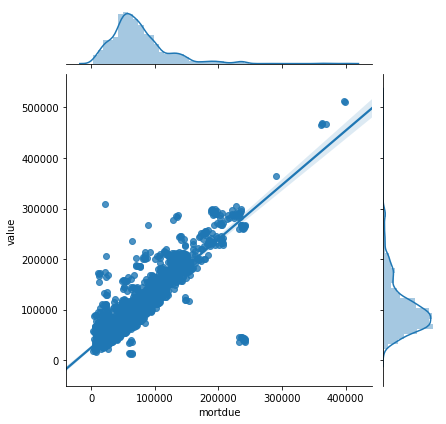

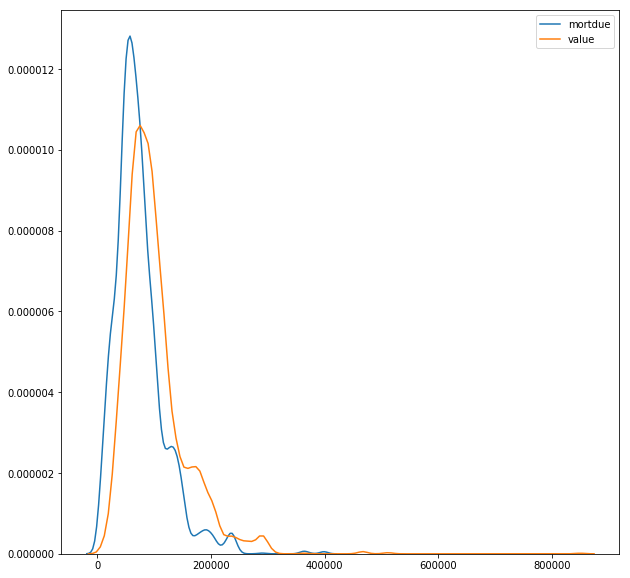

In [82]:
# iki değer de continuous variable olduğu için plot çizelim.
plt.figure(figsize=(10,10))
ax = sns.lineplot(x = data['mortdue'],y = data['value'])
sns.jointplot(x=data['mortdue'] ,y=data['value'],kind='regg');
plt.figure(figsize=(10,10)); sns.kdeplot(data['mortdue']); sns.kdeplot(data['value']);

In [83]:
#Burda değerler arasin da pozıtif bir ilişki var.Ama veride outlier var.Şimdi bunu kontrol edelim

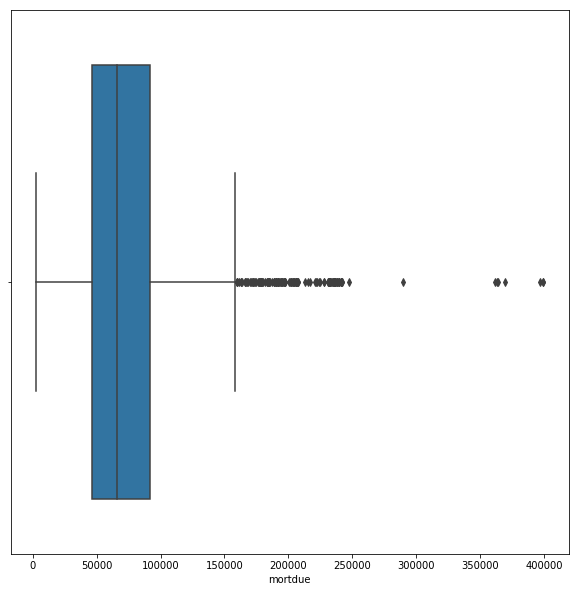

In [84]:
fig , ay  = plt.subplots(figsize = (10,10))
sns.boxplot(data['mortdue']);


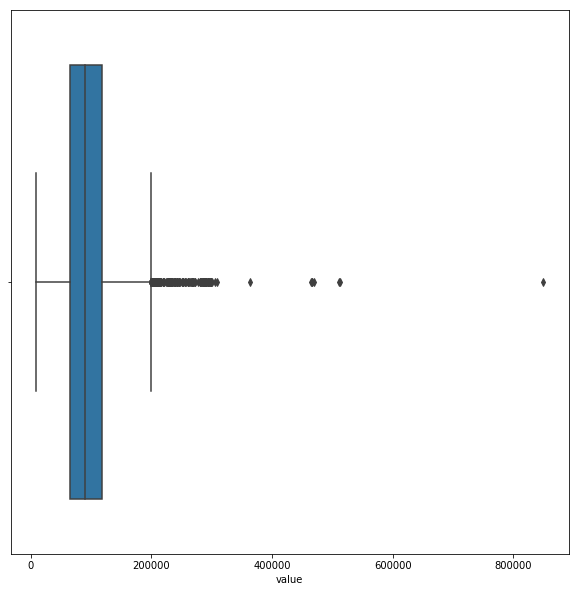

In [85]:
fig , ay  = plt.subplots(figsize = (10,10))
sns.boxplot(data['value']);


In [86]:
#boxplot görüldüğü üzere iki feuture bol miktarda outlier var

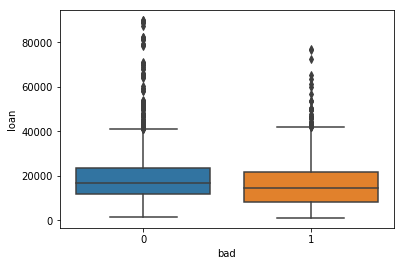

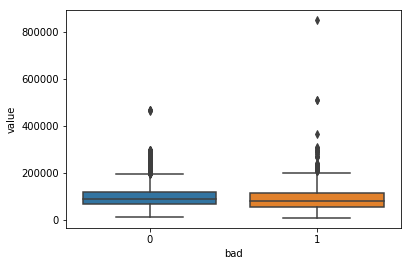

In [87]:
#bad değişkeninin loan ve value gore outleir ınceleyelim.
plt.figure()
sns.boxplot(x = 'bad' , y = 'loan', data = data)
plt.figure()
sns.boxplot(x = 'bad' , y = 'value' , data = data)

# Grafiklerden çikardımız sonucu istatiksel anlamda inceleyelim.


In [88]:
data.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason       0
job          0
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [89]:
data_bad = data.bad.copy()
data_loan = data.loan.copy()
data_mortdue = data.mortdue.dropna()
data_value = data.value.dropna()
data_yoj = data.yoj.dropna()
data_derog = data.derog.dropna()
data_delinq = data.delinq.dropna()
data_clage = data.clage.dropna()
data_ninq = data.ninq.dropna()
data_clno = data.clno.dropna()
data_debtinc = data.debtinc.dropna()



# boş değerler atılıyor

data_loan ;mean : 18529.697986577183 ,median : 16200.0 ,std : 11261.259169130972 
data_value ;mean : 101076.92275911162 ,median : 89183.0 ,std : 54857.463679557586 
data_mortdue ;mean : 74013.90799202943 ,median : 65858.0 ,std : 44010.08634582511 
data_clage ;mean : 179.83252870179572 ,median : 173.64 ,std : 87.05338204524965 


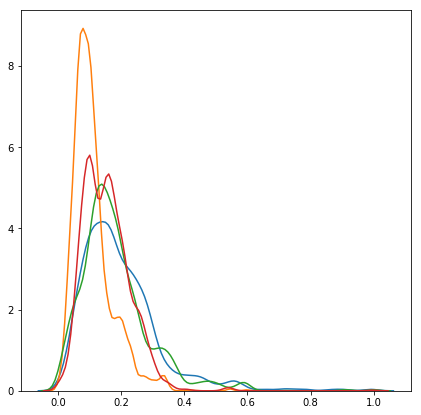

In [90]:
def normalize(liste):
    return (np.array(liste) - np.min(liste)) / (np.max(liste) - np.min(liste))

data_loan_norm = normalize(data_loan)
data_value_norm = normalize(data_value)
data_mortdue_norm = normalize(data_mortdue)
data_clage_norm = normalize(data_clage)
data_shapiro_conti = [data_loan_norm ,data_value_norm ,data_mortdue_norm ,data_clage_norm]
#grafik cizilebilmesi icin gerekli
data_shapiro_conti = [data_loan_norm ,data_value_norm ,data_mortdue_norm ,data_clage_norm]
print('data_loan ;mean : {} ,median : {} ,std : {} '.format(np.mean(data_loan),np.median(data_loan),np.std(data_loan)))
print('data_value ;mean : {} ,median : {} ,std : {} '.format(np.mean(data_value),np.median(data_value),np.std(data_value)))
print('data_mortdue ;mean : {} ,median : {} ,std : {} '.format(np.mean(data_mortdue),np.median(data_mortdue),np.std(data_mortdue)))
print('data_clage ;mean : {} ,median : {} ,std : {} '.format(np.mean(data_clage),np.median(data_clage),np.std(data_clage)))
plt.figure(figsize = (7,7))
for i in data_shapiro_conti:
    sns.kdeplot(i)
plt.show()

In [91]:
data_shapiro_index = ['data_loan','data_mortdue','data_value'
                      ,'data_yoj','data_derog','data_delinq','data_clage','data_ninq','data_clno','data_debtinc']
data_shapiro = [data_loan,data_mortdue,data_value,data_yoj,data_derog,data_delinq,data_clage,data_ninq,data_clno,data_debtinc]
p_value = []
for i in range(len(data_shapiro)):
    feature = i
    stat, p = shapiro(data_shapiro[feature])
    p_value.append(p)

In [92]:
p_value = pd.DataFrame(p_value,index = data_shapiro_index)
p_value.columns = ['P_VALUES']
p_value

,P_VALUES
data_loan,0.000000e+00
data_mortdue,1.821688e-44
data_value,0.000000e+00
data_yoj,2.555828e-41
data_derog,0.000000e+00
data_delinq,0.000000e+00
data_clage,3.604909e-39
data_ninq,0.000000e+00
data_clno,9.749810e-28
data_debtinc,0.000000e+00


In [93]:
alpha = 0.05
for i in range(len(p_value)):
    if p_value.P_VALUES[i] > alpha:
        print('Orneklem ( {} ) Normal (Gaussian) dağılımdan gelmektedir, (H0 Fail to reject)'.format(p_value.index[i]))  
    else:
        print('Orneklem ( {} )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)'.format(p_value.index[i]))
    

Orneklem ( data_loan )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( data_mortdue )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( data_value )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( data_yoj )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( data_derog )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( data_delinq )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( data_clage )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( data_ninq )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( data_clno )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( data_debtinc )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)


# Değerlerimiz normal dağilmadığını gördük.Normal dağilmadiği için levene testi yapicaz.
#Levene Testi: Bu test, normallikten sapma konusunda Bartlett testinden daha dayanıklıdır.

In [94]:
from scipy.stats import levene
lev = []
for i in data_shapiro:
    ist , p_v  = levene(data_bad,i)
    
    lev.append(p_v)
    
    
    
p_v = pd.DataFrame(lev,index = data_shapiro_index)
p_v.columns = ['P_V']
p_v
#p değerinin homojenliği test ederken 0.05’ten büyük olması lazım    




,P_V
data_loan,0.000000e+00
data_mortdue,0.000000e+00
data_value,0.000000e+00
data_yoj,0.000000e+00
data_derog,1.132386e-04
data_delinq,4.617546e-32
data_clage,0.000000e+00
data_ninq,1.356494e-302
data_clno,0.000000e+00
data_debtinc,0.000000e+00


In [95]:
for i in range(len(p_v)):
    if p_v.P_V[i] > alpha:
        print('Orneklem ( {} ) Orneklem Sabit varyansa(constant variance) sahiptir., (H0 Fail to reject)'.format(p_value.index[i]))  
    else:
        print('Orneklem ( {} )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)'.format(p_value.index[i]))    
        
        


Orneklem ( data_loan )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( data_mortdue )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( data_value )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( data_yoj )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( data_derog )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( data_delinq )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( data_clage )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( data_ninq )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( data_clno )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( data_debtinc )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)


Analysis of Variance (ANOVA)

In [96]:
'''
h0 : Bu veri setinde özellikler arasında ıstatıksel anlamda fark yoktur.
H1 : Bu veri setinde özellikler arasında ıstatıksel anlamda fark vardir.
'''

'\nh0 : Bu veri setinde özellikler arasında ıstatıksel anlamda fark yoktur.\nH1 : Bu veri setinde özellikler arasında ıstatıksel anlamda fark vardir.\n'

In [97]:
from scipy.stats import f_oneway
ista , pvalue = f_oneway(data_loan,data_mortdue,data_value,data_yoj,data_derog,data_delinq,data_clage,data_ninq,data_clno,data_debtinc)

In [98]:

if pvalue > alpha:
    print('Orneklem ( {} ) Bu veri setinde özellikler arasında ıstatıksel anlamda fark yokturr., (H0 Fail to reject)'.format(pvalue))  
else:
    print('Orneklem ( {} ) Bu veri setinde özellikler arasında ıstatıksel anlamda fark vardi, (H0 Reject)'.format(pvalue))

Orneklem ( 0.0 ) Bu veri setinde özellikler arasında ıstatıksel anlamda fark vardi, (H0 Reject)
